<img src="header.png" align="left"/>

# Anwendungsbeispiel Classification with CNN (MNIST)


Das Ziel des Beispieles ist es handschriftliche Ziffern zu klassifizieren.
Dazu verwenden wir den MNIST Datensatz [1]. Dieser Datensatz enthält 60.000 Scans von Ziffern zum Trainieren und 10.000 Scans von Ziffern für die Validierung. Ein Sample besteht aus 28x28 Features mit Werten zwischen 0 und 255. Zu beachten ist, dass die Features invertiert sind. Eigentlich sind Ziffern eher dunkel auf hellem Hintergrund. MNIST Ziffern sind hell auf dunklem Hintergrund.

Dieses Beispiel beruht auf einem Tutorial von Jason Brownlee [2] mit Hinweisen auf die Optimierung aus [3].

```
[1] http://yann.lecun.com/exdb/mnist/
[2] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
[3] https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
```

In [1]:
#
# Importieren der Module
#
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#
# Abdrehen von Fehlermeldungen
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [10, 5]

Using TensorFlow backend.
/Users/dietmar/opt/anaconda3/envs/wificlass/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dietmar/opt/anaconda3/envs/wificlass/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dietmar/opt/anaconda3/envs/wificlass/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

# Vorbereiten der Daten

In [2]:
#
# Laden der Beispieldaten (hier sehr vereinfacht) und gleichzeitige Aufteilung in Trainings- und Testdaten
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#
# Anzeige der Anzahl und Form der Samples
#
print('Trainingsdaten: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Testdaten: X=%s, y=%s' % (x_test.shape, y_test.shape))

Trainingsdaten: X=(60000, 28, 28), y=(60000,)
Testdaten: X=(10000, 28, 28), y=(10000,)


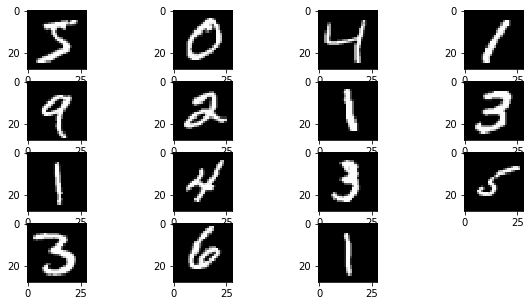

In [4]:
#
# Anzeige von Beispielen der Daten
#
for i in range(15):
    plt.subplot(4,4,1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
#
# Anzeige der Labels zu den Daten
#
for i in range(15):
    print('label {}'.format(y_train[i]))

label 5
label 0
label 4
label 1
label 9
label 2
label 1
label 3
label 1
label 4
label 3
label 5
label 3
label 6
label 1


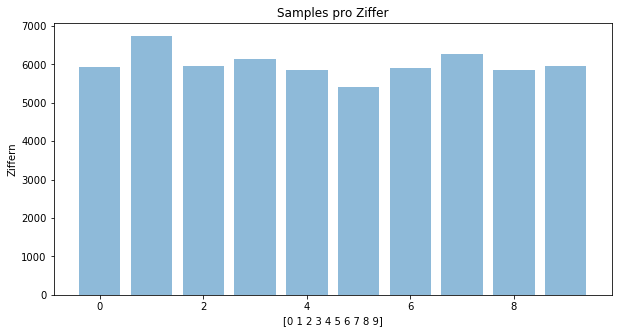

In [6]:
#
# Histogramm der Klassen (Ziffern)
#
#
# Prüfen der Verteilung der Klassen
#
df = pd.DataFrame(y_train,columns=['class'])
counts= df.groupby('class').size()

class_pos = np.arange(10)
plt.bar(class_pos, counts, align='center', alpha=0.5)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()


In [7]:
# 
# Ändere die Matrixform der Daten
#
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [8]:
# 
# Ändere Pixelwerte von 0..255 auf einen Wert zwischen 0 und 1 in Flieskommaform
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# 
# Ändere die Zielwerte für die Klassifizierung (eine Vektorstelle pro Klasse)
#
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Erstes Modell

In [10]:
#
# Aufbau eines CNN Modelles mit einer CNN Schicht
#
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=5 )

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.1500 - accuracy: 0.9553
Epoch 2/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0493 - accuracy: 0.9850
Epoch 3/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0297 - accuracy: 0.9907
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0206 - accuracy: 0.9933
Epoch 5/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0141 - accuracy: 0.9954


In [13]:
model.predict(x_train[:1])

array([[1.9562940e-15, 1.0274622e-13, 1.4177276e-11, 4.4524185e-03,
        2.1384189e-17, 9.9554753e-01, 1.2982699e-12, 6.9804221e-13,
        2.7478912e-09, 3.2624110e-09]], dtype=float32)

In [14]:
y_train[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [15]:
#
# Messen der Accuracy
#
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.98600


In [16]:
#
# Abschätzen der Fehler im Einsatz
#
print('Bei {} Samples sind rund {:.0f} Fehler zu erwarten.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

Bei 10000 Samples sind rund 140 Fehler zu erwarten.


# Verbesserung des Modelles

In [17]:
#
# Definition eines verbesserten Modelles mit folgenden Änderungen
# 1) weiterer convolutional layer
# 2) Vergrößerung der Filter
# 3) Vergrößerung des fully connected layers auf 256
# 4) Verlängerung des Trainings
#
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

In [18]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, batch_size=64, epochs=7 )

Epoch 1/7
60000/60000 [==============================] - 33s 550us/step - loss: 0.1241 - accuracy: 0.9619
Epoch 2/7
60000/60000 [==============================] - 35s 575us/step - loss: 0.0419 - accuracy: 0.9871
Epoch 3/7
60000/60000 [==============================] - 34s 572us/step - loss: 0.0286 - accuracy: 0.9907
Epoch 4/7
60000/60000 [==============================] - 34s 561us/step - loss: 0.0195 - accuracy: 0.9937
Epoch 5/7
60000/60000 [==============================] - 33s 556us/step - loss: 0.0157 - accuracy: 0.9948
Epoch 6/7
60000/60000 [==============================] - 34s 559us/step - loss: 0.0135 - accuracy: 0.9956
Epoch 7/7
60000/60000 [==============================] - 34s 561us/step - loss: 0.0105 - accuracy: 0.9966


In [20]:
#
# Messen der Accuracy
#
_, acc = model2.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.99110


In [21]:
#
# Abschätzen der Fehler im Einsatz
#
print('Bei {} Samples sind rund {:.0f} Fehler zu erwarten.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

Bei 10000 Samples sind rund 89 Fehler zu erwarten.


# Test des Modelles und Untersuchung der Fehler

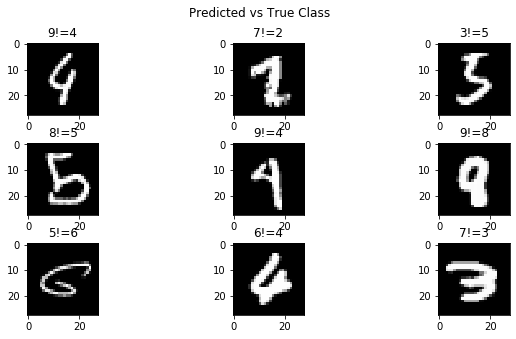

Anzahl der gefundenen Fehler ist 89


In [22]:
# Anzeige von Beispielen der Daten die fehlschlagen
from numpy import argmax

plotCount = 0
errorCount = 0
errorCountDistribution = [0] * 10
fig = plt.figure()
fig.suptitle('Predicted vs True Class')

for i in range(x_test.shape[0]):
    
    correctClass = argmax(y_test[i])
    image = x_test[i].reshape((1,28,28,1))
    prediction = model2.predict_classes([image])
    predictedClass = prediction[0]
    
    if predictedClass != correctClass:
        
        errorCount+= 1
        errorCountDistribution[correctClass] = errorCountDistribution[correctClass] + 1
        
        if plotCount < 9:
            ax = plt.subplot(330 + 1 + plotCount)
            ax.set_title('{}!={}'.format ( str(predictedClass), str(correctClass)))     
            image = x_test[i].reshape((28,28))
            plt.imshow(image, cmap=plt.get_cmap('gray'))    
            plotCount+= 1
        

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()
print('Anzahl der gefundenen Fehler ist {}'.format(errorCount))

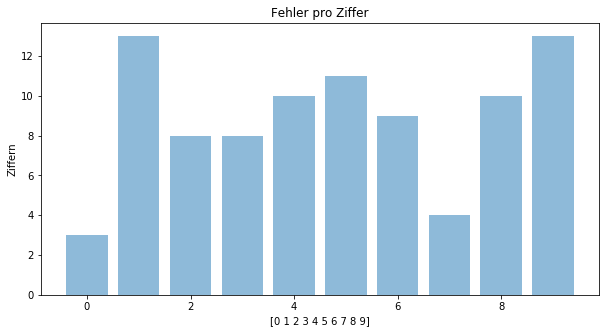

In [23]:
class_pos = np.arange(10)
plt.bar(class_pos, errorCountDistribution, align='center', alpha=0.5)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Fehler pro Ziffer')
plt.show()

# Testen mit eigenen Daten

In [24]:
# 
# Laden weiterer Funktionen
#
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [25]:
# Funktion für das Laden eines Bildes aus einer Datei
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [26]:
#
# Laden eines eigenen Bildes mit einer Ziffer (2,3,8,9)
#
image = load_image('data/3.png')

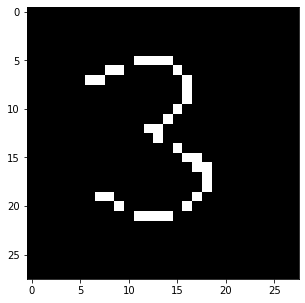

In [27]:
#
# Anzeige
#
imageShow = image.reshape((28,28))
plt.imshow(imageShow, cmap=plt.get_cmap('gray'))

In [28]:
prediction = model2.predict_classes([image])
predictedClass = prediction[0]

In [29]:
print('Die geschätzte Ziffer ist {}'.format(predictedClass) )

Die geschätzte Ziffer ist 3
